# Drag Data

Notebook to plot/evaluate drag data for hull shapes

Quick instructions:

* Read the code in this folder. :)

---
- Authors: Diego Montero, Fernando Valentini, Gustavo Violato
- First release: Jun. 2016

In [1]:
%load_ext autoreload
%autoreload 2

In [13]:
%matplotlib notebook
import hull_readdrag as hd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import display
from IPython.html import widgets

In [22]:
(drag_data, idxs) = hd.read_results('./results/drag_krecov_d*t*.dat')

In [32]:
Theta_Dict = {'{}'.format(idxs[1][i]):i for i in range(len(idxs[1]))}

<IPython.core.display.Javascript object>


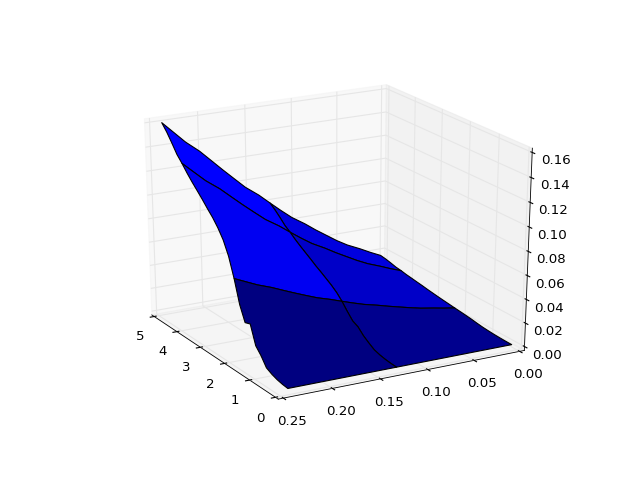

<function __main__.plotdrag>

In [36]:
def plotdrag(theta):
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    X,Y = np.meshgrid(idxs[0],idxs[2])
    Z = drag_data[:,Theta_Dict[theta[0]],:]
    ax.plot_surface(X,Y,Z.T)
    return ax

widgets.interact(plotdrag,
                 theta=widgets.SelectMultiple(
        description="Thetas",
        options=Theta_Dict.keys()))

In [62]:
ax2 = []

<IPython.core.display.Javascript object>


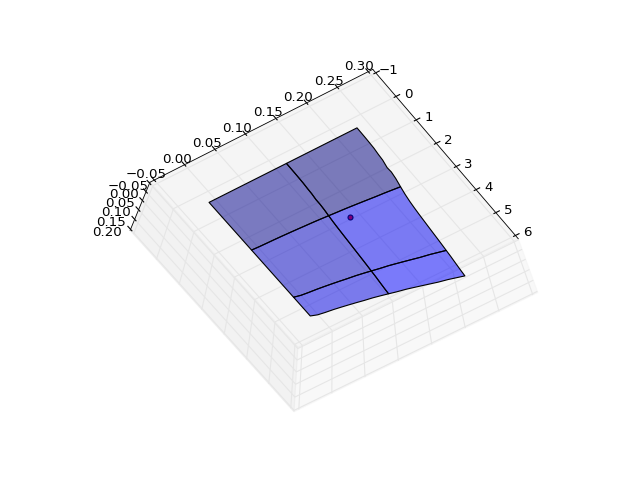

Arrasto: 2.480 kgf


In [83]:
hull_drag = hd.drag_fun(idxs,drag_data)
fig2 = plt.figure()
ax2 = fig2.gca(projection='3d')
plt.hold(True)
X,Y = np.meshgrid(idxs[0],idxs[2])
Z = drag_data[:,5,:]
ax2.plot_surface(X,Y,Z.T,color=(0,0,1,0.5))
arrasto = hull_drag([2.,0.56,0.15])
ax2.scatter(2.5,0.15,arrasto,c='r')
print 'Arrasto: {:.3f} kgf'.format(arrasto[0]*1000./9.80665)